# Main Dataset with all data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("bank_fraud_dataset final - Copy.csv")

### No. of frauds and non frauds

In [20]:
# Count the number of rows with fraud column equal to 1
num_fraudulent = (df["fraud"] == 1).sum()

# Print the result
print(f"There are {num_fraudulent} fraudulent transactions in the dataset.")

# Count the number of rows with fraud column equal to 1
num_non_fraudulent = (df["fraud"] == 0).sum()

# Print the result
print(f"There are {num_non_fraudulent} non fraudulent transactions in the dataset.")

print(f"Ratio of fraudulent to non fraudulent transactions is {num_fraudulent/num_non_fraudulent}")


There are 7200 fraudulent transactions in the dataset.
There are 587443 non fraudulent transactions in the dataset.
Ratio of fraudulent to non fraudulent transactions is 0.012256508291017171


### Preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("bank_fraud_dataset final - Copy.csv")

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the DataFrame and convert strings to integers
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Save the modified DataFrame to a new CSV file
data.to_csv("bank_fraud_dataset_preprocessing.csv", index=False)


### Feature Importance

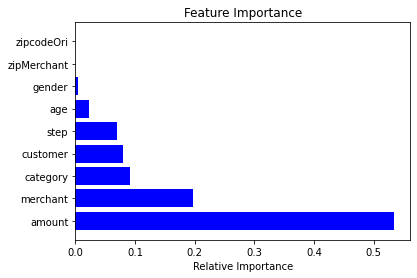

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("bank_fraud_dataset_preprocessing.csv")

# Split the dataset into features and labels
X = data.drop("fraud", axis=1)
y = data["fraud"]

# Train a random forest classifier on the data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Create a horizontal bar chart of feature importances
importances = clf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]
plt.figure()
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel('Relative Importance')
plt.savefig("Feature Importance.png")
plt.show()


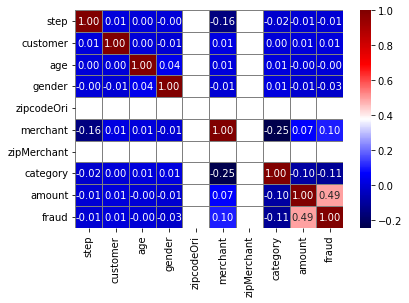

In [23]:
import seaborn as sns

# Load the dataset
data = pd.read_csv("bank_fraud_dataset_preprocessing.csv")

# Compute the correlation matrix
corr = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap='seismic', linewidths=0.5, linecolor='grey', annot=True, fmt='.2f')
plt.savefig("Heat Map after processing.png")
# Show the plot
plt.show()


# Reducing the dataset to n number of lines after deleting the least important features

In [24]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("bank_fraud_dataset final.csv")

# Shuffle the rows of the dataframe
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# Set the number of lines you want to randomly select
n = 30000
#n = len(df)

# Get the first n rows of the shuffled dataframe
random_rows = shuffled_df.head(n)

# Write the randomly selected rows to a new CSV file
random_rows.to_csv("bank_fraud_dataset reduced final.csv", index=False)


In [25]:
# Load the dataset
df = pd.read_csv('bank_fraud_dataset reduced final.csv')

print(df.columns)

Index(['customer', 'merchant', 'category', 'amount', 'fraud'], dtype='object')


### Scatter Plot for fraud and non fraud data based on category and amount

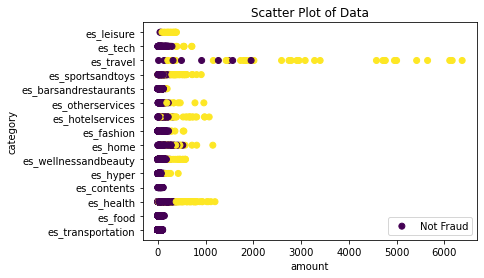

In [26]:
# Create a scatter plot of the data
plt.scatter(df['amount'], df['category'], c=df['fraud'])

# Add axis labels and title
plt.xlabel('amount')
plt.ylabel('category')
plt.title('Scatter Plot of Data')

# Add a legend
plt.legend(['Not Fraud', 'Fraud'], loc='lower right')
plt.savefig("Scatter Plot of category vs amount.png")
# Show the plot
plt.show()

### Splitting frauds in each category and visualizing

Fraudulent transactions by category:
health                99
sportsandtoys         93
wellnessandbeauty     38
travel                33
hotelservices         26
home                  21
leisure               18
otherservices         11
tech                   9
hyper                  8
fashion                8
barsandrestaurants     5
Name: category, dtype: int64


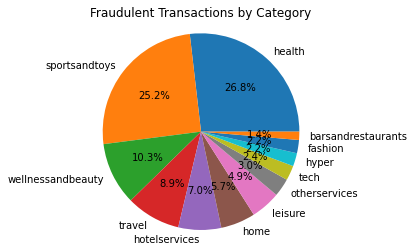

In [27]:
# Load the dataset
df["category"] = df["category"].str.replace("es_", "")

# Count the number of fraudulent transactions for each category
fraud_counts = df[df["fraud"] == 1]["category"].value_counts()

# Display the results
print("Fraudulent transactions by category:")
print(fraud_counts)

# Plot a pie chart
plt.pie(fraud_counts, labels=fraud_counts.index, autopct="%1.1f%%")
plt.title("Fraudulent Transactions by Category")
plt.axis("equal")
plt.savefig("Fraudulent Transactions by Category.png")
plt.show()


### Counting the frauds and getting ratio of fraud to non fraud

In [28]:
# Count the number of rows with fraud column equal to 1
num_fraudulent = (df["fraud"] == 1).sum()

# Print the result
print(f"There are {num_fraudulent} fraudulent transactions in the dataset.")

# Count the number of rows with fraud column equal to 1
num_non_fraudulent = (df["fraud"] == 0).sum()

# Print the result
print(f"There are {num_non_fraudulent} non fraudulent transactions in the dataset.")

print(f"Ratio of fraudulents to non fraudulent transactions is {num_fraudulent/num_non_fraudulent}")


There are 369 fraudulent transactions in the dataset.
There are 29631 non fraudulent transactions in the dataset.
Ratio of fraudulents to non fraudulent transactions is 0.012453174040700617


### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv("bank_fraud_dataset reduced final.csv")

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in the DataFrame and convert strings to integers
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

# Save the modified DataFrame to a new CSV file
data.to_csv("bank_fraud_dataset_label_encoding.csv", index=False)


### SMOTE

In [30]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv('bank_fraud_dataset_label_encoding.csv')

# Separate the features and labels
X = df.drop('fraud', axis=1)
y = df['fraud']

# Instantiate the SMOTE algorithm
smote = SMOTE()

# Fit and apply SMOTE to the dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Print the number of examples in each class before and after SMOTE
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(y_smote.value_counts())

# Save the SMOTE dataset to a new CSV file
smote_df = pd.concat([X_smote, y_smote], axis=1)
smote_df.to_csv('bank_fraud_dataset_label_encoding.csv', index=False)



Before SMOTE:
0    29631
1      369
Name: fraud, dtype: int64

After SMOTE:
0    29631
1    29631
Name: fraud, dtype: int64


### Feature Importance

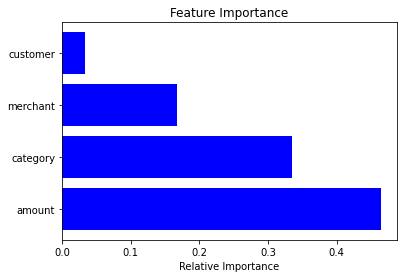

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv("bank_fraud_dataset_label_encoding.csv")

# Split the dataset into features and labels
X = data.drop("fraud", axis=1)
y = data["fraud"]

# Train a random forest classifier on the data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Create a horizontal bar chart of feature importances
importances = clf.feature_importances_
feature_names = X.columns
indices = importances.argsort()[::-1]
plt.figure()
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices], color='b', align='center')
plt.yticks(range(X.shape[1]), feature_names[indices])
plt.xlabel('Relative Importance')
plt.savefig("Feature Importance after feature removal.png")
plt.show()


### Heat Map

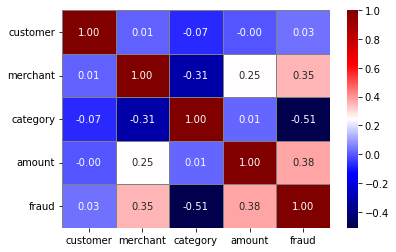

In [32]:
import seaborn as sns

# Load the dataset
data = pd.read_csv("bank_fraud_dataset_label_encoding.csv")

# Compute the correlation matrix
corr = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr, cmap='seismic', linewidths=0.5, linecolor='grey', annot=True, fmt='.2f')
plt.savefig("Herat Map after feature removal.png")
# Show the plot
plt.show()


### One Hot Encoding

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Load the dataset
df = pd.read_csv('bank_fraud_dataset reduced final.csv')

# Define categorical columns to one-hot encode
cat_cols = ['customer', 'merchant', 'category']

# Define the column transformer
ct = make_column_transformer(
    (OneHotEncoder(sparse_output=False), cat_cols),
    remainder='passthrough'
)

# Fit the column transformer to the data
ct.fit(df)

# Extract the feature names after one-hot encoding
feature_names = ct.get_feature_names_out()

# One-hot encode the categorical columns
encoded_cols = pd.DataFrame(ct.transform(df))
encoded_cols.columns = feature_names

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df.drop(cat_cols, axis=1), encoded_cols], axis=1)

# Save the modified dataframe as a new CSV file
df.to_csv('bank_fraud_dataset_one_hot_encoded.csv', index=False)

### SMOTE

In [34]:
import pandas as pd
from imblearn.over_sampling import SMOTE

df = pd.read_csv('bank_fraud_dataset_one_hot_encoded.csv')

# Separate the features and labels
X = df.drop('fraud', axis=1)
y = df['fraud']

# Instantiate the SMOTE algorithm
smote = SMOTE()

# Fit and apply SMOTE to the dataset
X_smote, y_smote = smote.fit_resample(X, y)

# Print the number of examples in each class before and after SMOTE
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(y_smote.value_counts())

# Save the SMOTE dataset to a new CSV file
smote_df = pd.concat([X_smote, y_smote], axis=1)
smote_df.to_csv('bank_fraud_dataset_one_hot_encoded.csv', index=False)



Before SMOTE:
0    29631
1      369
Name: fraud, dtype: int64

After SMOTE:
0    29631
1    29631
Name: fraud, dtype: int64
